In [1]:
# Imports
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
sample_answer = pd.read_csv('widsdatathon2022/sample_solution.csv')
train_df = pd.read_csv('widsdatathon2022/train.csv', index_col= 'id')
test_df = pd.read_csv('widsdatathon2022/test.csv')

# Exploring data

In [3]:
# See form answer should be in
sample_answer.head()

,id,site_eui
0,75757,0.0
1,75758,0.0
2,75759,0.0
3,75760,0.0
4,75761,0.0


In [4]:
# Show train data
train_df.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui
id,,,,,,,,,,,,,,,,,,,,,
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,0,14,0,0,0,1.0,1.0,1.0,NaN,248.682615
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,0,14,0,0,0,1.0,NaN,1.0,12.0,26.500150
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,0,14,0,0,0,1.0,NaN,1.0,12.0,24.693619
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,0,14,0,0,0,1.0,NaN,1.0,12.0,48.406926
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,0,14,0,0,0,1.0,1.0,1.0,NaN,3.899395


In [5]:
# Show test data
test_df.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
0,7,State_1,Commercial,Grocery_store_or_food_market,28484.0,1994.0,37.0,2.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75757
1,7,State_1,Commercial,Grocery_store_or_food_market,21906.0,1961.0,55.0,45.7,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75758
2,7,State_1,Commercial,Grocery_store_or_food_market,16138.0,1950.0,1.0,59.1,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75759
3,7,State_1,Commercial,Grocery_store_or_food_market,97422.0,1971.0,34.0,35.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75760
4,7,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,35.0,1.8,38,50.596774,...,0,29,5,2,0,340.0,330.0,22.8,126.0,75761


In [6]:
# Get info on columns in train_df
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75757 entries, 0 to 75756
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [7]:
# Describing train
train_df.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,...,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,...,0.876764,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,...,2.894244,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,...,0.000000,72.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,88.000000,54.528601
50%,5.000000,9.136700e+04,1951.000000,67.000000,25.000000,11.000000,34.451613,59.000000,9.000000,34.107143,...,0.000000,84.000000,12.000000,0.000000,0.000000,1.000000,1.000000,1.000000,104.000000,75.293716
75%,6.000000,1.660000e+05,1977.000000,85.000000,42.700000,13.000000,37.322581,62.000000,20.000000,40.879310,...,0.000000,97.000000,17.000000,0.000000,0.000000,1.000000,1.000000,1.000000,131.000000,97.277534
max,6.000000,6.385382e+06,2015.000000,100.000000,1924.500000,49.000000,64.758065,91.000000,48.000000,65.107143,...,31.000000,260.000000,185.000000,119.000000,16.000000,360.000000,360.000000,23.300000,311.000000,997.866120


In [8]:
# Drop wind and fog columns
train_df = train_df.drop(['direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog', 'direction_max_wind_speed'], axis= 1)
train_df

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,site_eui
id,,,,,,,,,,,,,,,,,,,,,
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.500000,...,56.972603,0,0,0,0,14,0,0,0,248.682615
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.500000,...,56.972603,0,0,0,0,14,0,0,0,26.500150
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.500000,...,56.972603,0,0,0,0,14,0,0,0,24.693619
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.500000,...,56.972603,0,0,0,0,14,0,0,0,48.406926
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.500000,...,56.972603,0,0,0,0,14,0,0,0,3.899395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,6,State_11,Commercial,Office_Uncategorized,20410.0,1995.0,8.0,36.6,28,43.451613,...,55.147541,6,0,0,0,25,3,0,0,132.918411
75753,6,State_11,Residential,5plus_Unit_Building,40489.0,1910.0,98.0,36.6,28,43.451613,...,55.147541,6,0,0,0,25,3,0,0,39.483672
75754,6,State_11,Commercial,Commercial_Other,28072.0,1917.0,NaN,36.6,26,36.612903,...,47.911202,26,2,0,0,6,0,0,0,48.404398


In [9]:
# Get info on test data
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9705 entries, 0 to 9704
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                9705 non-null   int64  
 1   State_Factor               9705 non-null   object 
 2   building_class             9705 non-null   object 
 3   facility_type              9705 non-null   object 
 4   floor_area                 9705 non-null   float64
 5   year_built                 9613 non-null   float64
 6   energy_star_rating         7451 non-null   float64
 7   ELEVATION                  9705 non-null   float64
 8   january_min_temp           9705 non-null   int64  
 9   january_avg_temp           9705 non-null   float64
 10  january_max_temp           9705 non-null   int64  
 11  february_min_temp          9705 non-null   int64  
 12  february_avg_temp          9705 non-null   float64
 13  february_max_temp          9705 non-null   int64

In [10]:
# Describe test data
test_df.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
count,9705.0,9.705000e+03,9613.000000,7451.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,...,9705.000000,9705.000000,9705.000000,9705.000000,9705.0,1130.000000,1130.000000,1130.000000,588.000000,9705.000000
mean,7.0,1.632143e+05,1963.219598,64.712924,205.231190,13.520762,36.678081,60.008449,21.705100,41.634886,...,1.323029,66.820093,11.941267,0.211643,0.0,321.743363,310.194690,18.131327,150.755102,80609.000000
std,0.0,2.624759e+05,40.819953,27.935984,264.822814,12.458365,6.968520,5.874699,9.774624,5.528689,...,2.205729,30.936872,13.077936,0.615250,0.0,19.127690,38.969875,1.993348,58.760576,2801.736515
min,7.0,5.982000e+03,0.000000,1.000000,1.800000,-1.000000,27.548387,42.000000,9.000000,33.428571,...,0.000000,15.000000,1.000000,0.000000,0.0,280.000000,240.000000,14.800000,34.000000,75757.000000
25%,7.0,4.802000e+04,1929.000000,45.000000,26.500000,-1.000000,27.548387,54.000000,9.000000,36.053571,...,0.000000,39.000000,3.000000,0.000000,0.0,310.000000,270.000000,16.500000,129.000000,78183.000000
50%,7.0,8.248600e+04,1969.000000,72.000000,118.900000,15.000000,38.661290,59.000000,22.000000,41.625000,...,0.000000,77.000000,5.000000,0.000000,0.0,330.000000,320.000000,18.300000,129.000000,80609.000000
75%,7.0,1.775200e+05,1994.000000,88.000000,231.300000,21.000000,41.177419,64.000000,28.000000,45.685185,...,5.000000,79.000000,12.000000,0.000000,0.0,340.000000,340.000000,19.200000,138.000000,83035.000000
max,7.0,6.353396e+06,2016.000000,100.000000,812.000000,38.000000,50.596774,71.000000,40.000000,54.482143,...,5.000000,122.000000,41.000000,2.000000,0.0,360.000000,350.000000,23.300000,250.000000,85461.000000


In [11]:
# Check for duplicates
train_df.duplicated().sum()

39

In [12]:
# Drop duplicates
train_df = train_df.drop_duplicates()
train_df

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,site_eui
id,,,,,,,,,,,,,,,,,,,,,
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.500000,...,56.972603,0,0,0,0,14,0,0,0,248.682615
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.500000,...,56.972603,0,0,0,0,14,0,0,0,26.500150
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.500000,...,56.972603,0,0,0,0,14,0,0,0,24.693619
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.500000,...,56.972603,0,0,0,0,14,0,0,0,48.406926
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.500000,...,56.972603,0,0,0,0,14,0,0,0,3.899395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,6,State_11,Commercial,Office_Uncategorized,20410.0,1995.0,8.0,36.6,28,43.451613,...,55.147541,6,0,0,0,25,3,0,0,132.918411
75753,6,State_11,Residential,5plus_Unit_Building,40489.0,1910.0,98.0,36.6,28,43.451613,...,55.147541,6,0,0,0,25,3,0,0,39.483672
75754,6,State_11,Commercial,Commercial_Other,28072.0,1917.0,NaN,36.6,26,36.612903,...,47.911202,26,2,0,0,6,0,0,0,48.404398


In [13]:
# How many unique values in each column
train_df.nunique()

Year_Factor                 6
State_Factor                7
building_class              2
facility_type              60
floor_area              20433
year_built                180
energy_star_rating        101
ELEVATION                 193
january_min_temp           59
january_avg_temp          165
january_max_temp           49
february_min_temp          53
february_avg_temp         168
february_max_temp          43
march_min_temp             54
march_avg_temp            166
march_max_temp             42
april_min_temp             36
april_avg_temp            164
april_max_temp             33
may_min_temp               35
may_avg_temp              165
may_max_temp               39
june_min_temp              36
june_avg_temp             162
june_max_temp              43
july_min_temp              31
july_avg_temp             161
july_max_temp              41
august_min_temp            31
august_avg_temp           167
august_max_temp            42
september_min_temp         36
september_

In [14]:
# How many residential vs commercial
train_df['building_class'].value_counts()

Residential    43533
Commercial     32185
Name: building_class, dtype: int64

In [15]:
# Different types of facilities
train_df['facility_type'].value_counts().shape

(60,)

In [16]:
# Value counts for each type of building
building_type = train_df['facility_type'].value_counts()
building_type

Multifamily_Uncategorized                    39430
Office_Uncategorized                         12508
Education_Other_classroom                     3860
Lodging_Hotel                                 2098
2to4_Unit_Building                            1893
Commercial_Other                              1744
5plus_Unit_Building                           1273
Warehouse_Nonrefrigerated                     1255
Retail_Uncategorized                          1130
Education_College_or_university               1053
Nursing_Home                                   772
Education_Uncategorized                        704
Mixed_Use_Commercial_and_Residential           672
Lodging_Dormitory_or_fraternity_sorority       669
Warehouse_Distribution_or_Shipping_center      604
Warehouse_Selfstorage                          577
Grocery_store_or_food_market                   448
Office_Medical_non_diagnostic                  447
Health_Care_Inpatient                          407
Religious_worship              

In [17]:
# Get the mean of each type of facility
grouped = train_df.groupby(by=['facility_type'], axis= 0).mean()
grouped

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,site_eui
facility_type,,,,,,,,,,,,,,,,,,,,,
2to4_Unit_Building,5.496038,41848.564184,1968.720930,69.846715,36.374749,27.989963,44.425498,59.510301,32.983096,47.982174,...,55.404531,7.038035,0.002113,0.000000,0.000000,32.531960,2.496038,0.000000,0.000000,31.876915
5plus_Unit_Building,5.498036,102880.819324,1984.477201,71.283001,27.770621,27.946583,44.368193,59.406913,32.970935,47.955531,...,55.421290,7.148468,0.028280,0.000000,0.000000,32.582875,2.636292,0.003142,0.000000,36.737785
Commercial_Other,4.364679,123562.565367,1949.335119,65.343750,35.354243,16.021789,37.359055,59.889908,17.947821,39.441326,...,56.227461,37.962156,12.034404,3.068807,0.491972,70.850344,11.640482,0.337156,0.000000,92.642037
Commercial_Unknown,4.115789,251835.768421,1959.137500,59.136364,38.463158,11.621053,33.732179,59.000000,13.936842,36.133976,...,57.255799,60.652632,18.115789,5.515789,0.000000,103.284211,28.021053,0.673684,0.000000,113.151628
Data_Center,4.296296,562675.888889,1962.259259,36.555556,42.840741,14.814815,37.011350,61.222222,14.851852,38.187004,...,57.011389,45.925926,16.333333,4.703704,0.777778,84.629630,15.222222,1.000000,0.000000,339.734876
Education_College_or_university,4.542260,245820.236467,1952.891262,52.076923,64.763818,8.777778,32.329740,57.760684,8.809117,33.519564,...,55.210642,63.777778,24.409307,9.014245,2.612536,86.622032,16.439696,0.271605,0.000000,108.697357
Education_Other_classroom,5.216062,115680.592098,1950.478420,61.258570,70.813212,6.977202,31.040746,56.355440,4.464249,32.635646,...,54.799664,66.035751,25.674611,10.013731,3.578238,87.800518,15.147150,0.059845,0.000000,69.441531
Education_Preschool_or_daycare,5.935185,32018.666667,1961.416667,NaN,21.865741,10.490741,34.012465,58.370370,-0.453704,36.926946,...,56.989870,43.287037,13.009259,3.240741,1.296296,95.546296,17.453704,0.000000,0.000000,60.974215
Education_Uncategorized,3.328125,50955.673295,1948.835443,13.142857,177.410227,28.485795,49.628687,73.467330,31.150568,51.005393,...,62.436755,15.268466,2.890625,0.690341,0.166193,116.241477,47.535511,10.042614,0.262784,46.072043


In [18]:
# Floor sizes, mean, max, min
print('Mean floor size ', round(train_df['floor_area'].mean(), 2), 'Max floor size ', train_df['floor_area'].max(), 'Min floor size ', train_df['floor_area'].min())

Mean floor size  165775.62 Max floor size  6385382.0 Min floor size  943.0


# Visuals

<BarContainer object of 100 artists>

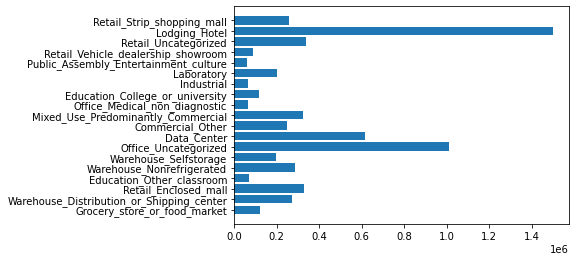

In [19]:
# Bar chart with first 100 building types and floor space
plt.barh(train_df['facility_type'][:100], width= train_df['floor_area'][:100])

In [20]:
# Show heat map by building type
grouped.style.background_gradient(cmap= 'viridis')

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,site_eui
facility_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2to4_Unit_Building,5.496038,41848.564184,1968.720930,69.846715,36.374749,27.989963,44.425498,59.510301,32.983096,47.982174,62.987850,31.969361,50.025425,70.983624,38.471210,54.021896,83.437401,42.974115,59.120009,84.452721,47.491284,65.324168,90.489171,54.486529,68.933984,91.525092,51.487586,68.494649,89.996830,43.986265,60.885919,79.498151,42.521395,56.442718,71.012150,33.437401,47.829213,64.936080,26.497623,40.978069,54.506075,345.236133,3763.001057,42.357628,0.805230,1.374538,55.404531,7.038035,0.002113,0.000000,0.000000,32.531960,2.496038,0.000000,0.000000,31.876915
5plus_Unit_Building,5.498036,102880.819324,1984.477201,71.283001,27.770621,27.946583,44.368193,59.406913,32.970935,47.955531,63.055774,32.051060,50.009819,71.025137,38.519246,54.128895,83.651218,43.045562,59.166270,84.611940,47.508248,65.315253,90.535742,54.511390,68.926906,91.426551,51.529458,68.537149,90.043205,44.003142,60.947944,79.520817,42.378633,56.422484,70.939513,33.644148,47.964467,65.171249,26.428123,40.926786,54.441477,346.970935,3758.587588,42.277070,0.736528,0.532600,55.421290,7.148468,0.028280,0.000000,0.000000,32.582875,2.636292,0.003142,0.000000,36.737785
Commercial_Other,4.364679,123562.565367,1949.335119,65.343750,35.354243,16.021789,37.359055,59.889908,17.947821,39.441326,60.533830,25.206422,46.287522,71.405390,33.929472,54.187160,83.324541,44.320528,62.623563,88.070528,50.528670,69.567331,91.528096,58.953555,74.631666,94.889335,56.554472,73.358594,91.768349,49.129587,67.496822,89.336009,39.161124,58.456160,79.828555,30.371560,48.466178,69.866399,24.018349,41.920946,62.345183,981.066514,4091.989679,42.465384,21.864794,128.990826,56.227461,37.962156,12.034404,3.068807,0.491972,70.850344,11.640482,0.337156,0.000000,92.642037
Commercial_Unknown,4.115789,251835.768421,1959.137500,59.136364,38.463158,11.621053,33.732179,59.000000,13.936842,36.133976,68.336842,20.094737,46.037937,77.263158,32.473684,56.070238,85.452632,44.168421,66.059115,90.957895,53.157895,73.572601,96.147368,60.168421,77.599355,98.063158,58.494737,75.767374,94.231579,49.389474,70.778512,93.957895,35.747368,58.503685,82.610526,27.010526,48.222895,76.294737,23.021053,43.614278,69.315789,1354.442105,4014.768421,40.804421,16.847368,24.684211,57.255799,60.652632,18.115789,5.515789,0.000000,103.284211,28.021053,0.673684,0.000000,113.151628
Data_Center,4.296296,562675.888889,1962.259259,36.555556,42.840741,14.814815,37.011350,61.222222,14.851852,38.187004,60.555556,24.703704,45.801673,71.259259,33.259259,55.011728,83.111111,45.000000,63.713262,89.185185,51.666667,70.520988,92.111111,59.851852,75.165472,94.814815,57.148148,73.932497,92.111111,51.000000,69.852840,94.000000,39.592593,60.175627,84.222222,29.703704,50.012346,72.888889,24.555556,43.784946,66.444444,1116.666667,3939.148148,37.323333,27.396296,161.814815,57.011389,45.925926,16.333333,4.703704,0.777778,84.629630,15.222222,1.000000,0.000000,339.734876
Education_College_or_university,4.542260,245820.236467,1952.891262,52.076923,64.763818,8.777778,32.329740,57.760684,8.809117,33.519564,59.324786,18.

In [21]:
# Get mean building year and change to int 
train_df['year_built'].mean().astype(int)

1952

<AxesSubplot:xlabel='site_eui', ylabel='avg_temp'>

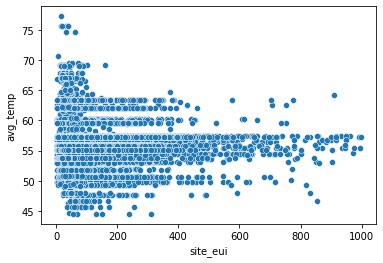

In [22]:
# Show how the average temp effects energy usage intensity
sns.scatterplot(y= 'avg_temp', x= 'site_eui', data= train_df)

In [23]:
# Grouped by year
grouped_year = train_df.groupby(by= ['year_built'], axis= 0).mean()
grouped_year

,Year_Factor,floor_area,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,...,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,site_eui
year_built,,,,,,,,,,,,,,,,,,,,,
0.0,3.500000,204392.000000,68.166667,22.416667,32.000000,50.569892,69.000000,35.500000,53.127360,73.833333,...,59.902787,6.666667,0.333333,0.000000,0.000000,63.000000,17.500000,1.833333,0.0,71.274566
1600.0,3.500000,276000.000000,83.833333,39.850000,8.833333,32.497312,58.166667,10.333333,34.017344,57.333333,...,56.314574,49.166667,16.000000,3.166667,0.166667,84.666667,12.833333,0.166667,0.0,60.701479
1649.0,3.750000,108000.000000,64.000000,11.075000,9.750000,33.862903,60.000000,11.250000,36.030480,58.500000,...,56.133163,44.500000,12.750000,2.250000,0.250000,79.500000,12.250000,0.000000,0.0,78.032138
1732.0,6.000000,23860.000000,NaN,3.000000,8.000000,29.827586,62.000000,4.000000,33.896552,62.000000,...,53.839335,97.000000,29.000000,6.000000,0.000000,101.000000,21.000000,0.000000,0.0,35.077000
1756.0,4.500000,873226.000000,32.500000,29.850000,5.000000,28.971774,59.750000,6.250000,29.650980,56.250000,...,53.488327,91.750000,33.750000,10.500000,2.000000,94.000000,14.500000,0.000000,0.0,252.757716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011.0,4.917563,184426.078853,67.625668,47.785305,9.179211,32.353312,57.440860,7.641577,33.365257,57.931900,...,55.573554,57.551971,21.580645,6.921147,1.440860,87.200717,15.204301,0.000000,0.0,68.133685
2012.0,5.181303,185682.032861,66.021583,45.139093,10.912181,33.259022,57.407932,9.254958,34.433637,58.433428,...,55.547316,54.002833,20.056657,6.422096,1.371105,83.356941,14.008499,0.000000,0.0,73.551631
2013.0,5.482412,156332.072864,65.805643,58.365578,11.165829,33.326517,56.283920,9.020101,34.629403,59.060302,...,55.370754,52.937186,21.311558,7.721106,2.155779,81.967337,15.246231,0.000000,0.0,80.872618


In [24]:
# Year built heat map
grouped_year.style.background_gradient(cmap= 'viridis')

In [25]:
# Grouped by site_eui
grouped_eui = train_df.groupby(by=['site_eui'], axis= 0).mean()
grouped_eui

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F
site_eui,,,,,,,,,,,,,,,,,,,,,
1.001169,5.0,53000.0,1929.0,NaN,114.3,3.0,24.016129,49.0,-5.0,18.910714,...,295.0,50.634722,124.0,59.0,30.0,8.0,95.0,6.0,0.0,0.0
1.002998,5.0,103000.0,1917.0,100.0,21.3,8.0,29.854839,56.0,2.0,23.946429,...,463.0,56.835616,63.0,34.0,9.0,0.0,106.0,12.0,0.0,0.0
1.003281,2.0,90000.0,1929.0,NaN,3.4,13.0,37.322581,62.0,20.0,40.879310,...,10.0,57.366120,22.0,5.0,0.0,0.0,72.0,17.0,0.0,0.0
1.029295,3.0,84800.0,1927.0,NaN,11.9,11.0,35.080645,61.0,17.0,33.910714,...,64.0,55.449315,50.0,11.0,0.0,0.0,75.0,11.0,0.0,0.0
1.061067,5.0,70000.0,1995.0,NaN,291.4,2.0,26.516129,51.0,-2.0,21.553571,...,84.0,52.895890,108.0,43.0,20.0,7.0,111.0,15.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970.388586,4.0,56433.0,1926.0,1.0,213.4,3.0,28.290323,59.0,13.0,34.107143,...,39.0,54.651685,88.0,26.0,12.0,0.0,93.0,17.0,0.0,0.0
975.452321,3.0,10000.0,1914.0,NaN,15.2,11.0,35.080645,61.0,17.0,33.910714,...,64.0,55.449315,50.0,11.0,0.0,0.0,75.0,11.0,0.0,0.0
989.887978,6.0,63000.0,1930.0,NaN,3.4,11.0,34.451613,59.0,-1.0,37.706897,...,101.0,57.215847,40.0,11.0,2.0,1.0,96.0,17.0,0.0,0.0


In [31]:
# Mean of site _eui
train_df['site_eui'].mean()

82.56838214174053